## Time Series 

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("/Users/aryansaini/Documents/Virtual Environment/Python/Pandas/Part 4/aapl.csv")
df

,Date,Open,High,Low,Close,Volume
0,7-Jul-17,142.90,144.75,142.90,144.18,19201712
1,6-Jul-17,143.02,143.50,142.41,142.73,24128782
2,5-Jul-17,143.69,144.79,142.72,144.09,21569557
3,3-Jul-17,144.88,145.30,143.10,143.50,14277848
4,30-Jun-17,144.45,144.96,143.78,144.02,23024107
...,...,...,...,...,...,...
246,15-Jul-16,98.92,99.30,98.50,98.78,30136990
247,14-Jul-16,97.39,98.99,97.32,98.79,38918997
248,13-Jul-16,97.41,97.67,96.84,96.87,25892171
249,12-Jul-16,97.17,97.70,97.12,97.42,24167463


In [3]:
# We are going to focus on DateTimeIndex and Resampling 

In [6]:
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
#WE can parse the date column as type date
df = pd.read_csv("/Users/aryansaini/Documents/Virtual Environment/Python/Pandas/Part 4/aapl.csv", parse_dates=['Date'], index_col='Date')
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107
...,...,...,...,...,...
2016-07-15,98.92,99.30,98.50,98.78,30136990
2016-07-14,97.39,98.99,97.32,98.79,38918997
2016-07-13,97.41,97.67,96.84,96.87,25892171


In [8]:
df.index

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [10]:
#Converting date into date type has the below benefit

df["2017-01"]

/var/folders/48/l14403_9457144q4v0_bsdzh0000gn/T/ipykernel_17493/751101342.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df["2017-01"]


,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


In [13]:
df["2017-01"].Close.min()

/var/folders/48/l14403_9457144q4v0_bsdzh0000gn/T/ipykernel_17493/4280014364.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df["2017-01"].Close.min()


116.02

In [19]:
df["2017-01":"2017-02"]

/var/folders/48/l14403_9457144q4v0_bsdzh0000gn/T/ipykernel_17493/1293930392.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df["2017-01":"2017-02"]


,Open,High,Low,Close,Volume
Date,,,,,
2017-02-28,137.08,137.44,136.70,136.99,23482860
2017-02-27,137.14,137.44,136.28,136.93,20257426
2017-02-24,135.91,136.66,135.28,136.66,21776585
2017-02-23,137.38,137.48,136.30,136.53,20788186
2017-02-22,136.43,137.12,136.11,137.11,20836932
2017-02-21,136.23,136.75,135.98,136.70,24507156
2017-02-17,135.10,135.83,135.10,135.72,22198197
2017-02-16,135.67,135.90,134.84,135.34,22584555
2017-02-15,135.52,136.27,134.62,135.51,35623100


In [ ]:
# Resampling 

<AxesSubplot:xlabel='Date'>

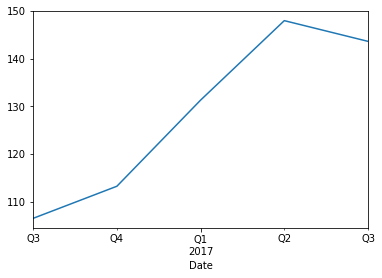

In [26]:
#Gives the mean open price monthly
df.Open.resample("Q").mean().plot()

<AxesSubplot:xlabel='Date'>

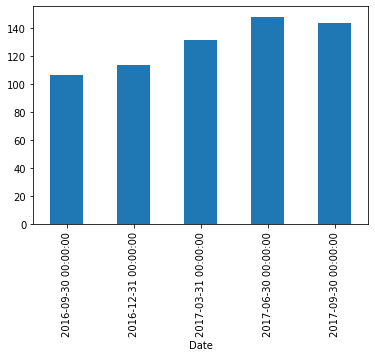

In [29]:
df.Open.resample("Q").mean().plot(kind = "bar")

<AxesSubplot:xlabel='Date'>

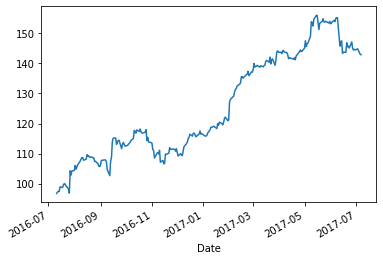

In [31]:
df.Open.plot()

In [32]:
#date_range : When you have downloaded time series data for example of Stock price and there is no date column 
#we can implement date_range to overcome that.

In [33]:
df = pd.read_csv("/Users/aryansaini/Documents/Virtual Environment/Python/Pandas/Part 4/aapl_no_dates.csv")
df

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647
5,155.25,155.54,154.40,154.99,21250798
6,155.19,155.19,146.02,148.98,64882657
7,145.74,146.09,142.51,145.42,72307330
8,147.16,147.45,145.15,146.59,34165445
9,147.50,147.50,143.84,145.16,31531232


In [37]:
date_rng = pd.date_range(start="6/1/2017", end="6/30/2017", freq="B")
date_rng

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', freq='B')

In [38]:
df.set_index(date_rng, inplace=True)
df

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-12,145.74,146.09,142.51,145.42,72307330
2017-06-13,147.16,147.45,145.15,146.59,34165445
2017-06-14,147.50,147.50,143.84,145.16,31531232


<AxesSubplot:>

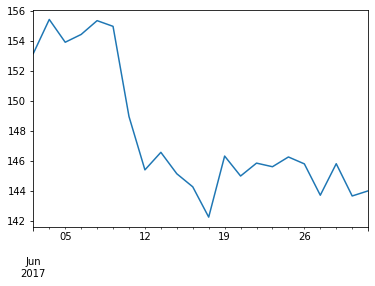

In [39]:
df.Close.plot()

<AxesSubplot:>

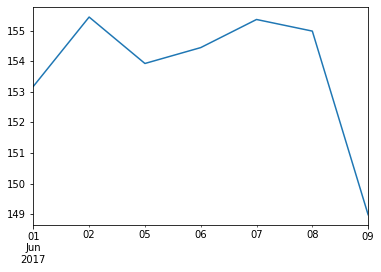

In [45]:
#Ploting first 10 days
df["2017-06-01" : "2017-06-10"].Close.plot()

In [46]:
#Suppose you want stock price data to be present on the weekends as well
#You can do that by implementing asfreq() 

In [47]:
df.asfreq("D", method="pad")

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-03,153.58,155.45,152.89,155.45,27770715
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-10,155.19,155.19,146.02,148.98,64882657


In [51]:
datr_rng1 = pd.date_range(start="2019/02/01", periods=77, freq="B")
datr_rng1

DatetimeIndex(['2019-02-01', '2019-02-04', '2019-02-05', '2019-02-06',
               '2019-02-07', '2019-02-08', '2019-02-11', '2019-02-12',
               '2019-02-13', '2019-02-14', '2019-02-15', '2019-02-18',
               '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
               '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28',
               '2019-03-01', '2019-03-04', '2019-03-05', '2019-03-06',
               '2019-03-07', '2019-03-08', '2019-03-11', '2019-03-12',
               '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-18',
               '2019-03-19', '2019-03-20', '2019-03-21', '2019-03-22',
               '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28',
               '2019-03-29', '2019-04-01', '2019-04-02', '2019-04-03',
               '2019-04-04', '2019-04-05', '2019-04-08', '2019-04-09',
               '2019-04-10', '2019-04-11', '2019-04-12', '2019-04-15',
               '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-19',
      

In [55]:
#Creating a pandas series
import numpy as np
ts = pd.Series(np.random.randint(1,10, len(datr_rng1)), index= datr_rng1)
ts

2019-02-01    3
2019-02-04    3
2019-02-05    7
2019-02-06    9
2019-02-07    3
             ..
2019-05-14    7
2019-05-15    2
2019-05-16    7
2019-05-17    4
2019-05-20    8
Freq: B, Length: 77, dtype: int64

In [57]:
df = pd.read_csv("/Users/aryansaini/Documents/Virtual Environment/Python/Pandas/Part 4/aapl_no_dates.csv")

In [58]:
df

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647
5,155.25,155.54,154.40,154.99,21250798
6,155.19,155.19,146.02,148.98,64882657
7,145.74,146.09,142.51,145.42,72307330
8,147.16,147.45,145.15,146.59,34165445
9,147.50,147.50,143.84,145.16,31531232


In [59]:
#NOt moving forward with time series part of the course as of yet 

